In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import  StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.decomposition import PCA


In [2]:
data=pd.read_csv('titanic.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:

data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
data.shape

(891, 12)

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data=data.drop(['Cabin','Ticket'],axis=1)

In [8]:
data.head()
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [9]:
#misssing values for age
l1=[]
firstletter=list(data['Name'])
for k in firstletter:
    t1=k.split(',')[1]
    t2=t1.split('.')[0]
    l1.append(t2)
data['title']=l1

In [10]:
medi=data.groupby('title').Age.transform('median')
data.Age.fillna(medi,inplace=True)


In [11]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
data.Embarked.fillna('S',inplace=True)

In [13]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
title          0
dtype: int64

In [14]:
data_1=data.drop(['Name','PassengerId','Embarked'],axis=1)
data_1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,title
0,0,3,male,22.0,1,0,7.2500,Mr
1,1,1,female,38.0,1,0,71.2833,Mrs
2,1,3,female,26.0,0,0,7.9250,Miss
3,1,1,female,35.0,1,0,53.1000,Mrs
4,0,3,male,35.0,0,0,8.0500,Mr


In [15]:
data_1['Survived']=data_1['Survived'].astype('category')
data_1.dtypes

Survived    category
Pclass         int64
Sex           object
Age          float64
SibSp          int64
Parch          int64
Fare         float64
title         object
dtype: object

In [16]:
df=pd.get_dummies(data_1,drop_first=False)
df.head()

,Pclass,Age,SibSp,Parch,Fare,Survived_0,Survived_1,Sex_female,Sex_male,title_ Capt,...,title_ Master,title_ Miss,title_ Mlle,title_ Mme,title_ Mr,title_ Mrs,title_ Ms,title_ Rev,title_ Sir,title_ the Countess
0,3,22.0,1,0,7.2500,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,38.0,1,0,71.2833,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,26.0,0,0,7.9250,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3,35.0,0,0,8.0500,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [17]:
### Elbow method

ks=range(1,9)
inertia=[]


In [18]:
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(df)
    inertia.append(model.inertia_)

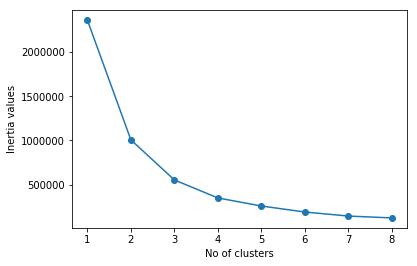

In [19]:
plt.plot(ks,inertia,'-o')
plt.xlabel('No of clusters')
plt.ylabel('Inertia values')
plt.xticks(ks)
plt.show()

In [20]:
models=KMeans(n_clusters=4)
models.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
labels=models.predict(df)
labels

array([0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [22]:
# Finding the centroids
centroids=models.cluster_centers_
#centroids

In [23]:
df.head()

,Pclass,Age,SibSp,Parch,Fare,Survived_0,Survived_1,Sex_female,Sex_male,title_ Capt,...,title_ Master,title_ Miss,title_ Mlle,title_ Mme,title_ Mr,title_ Mrs,title_ Ms,title_ Rev,title_ Sir,title_ the Countess
0,3,22.0,1,0,7.2500,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,38.0,1,0,71.2833,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,26.0,0,0,7.9250,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3,35.0,0,0,8.0500,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [24]:
centroid_x=centroids[:,0]
centroid_y=centroids[:,5]


In [25]:
xs=data.iloc[:,0]
ys=data.iloc[:,5]

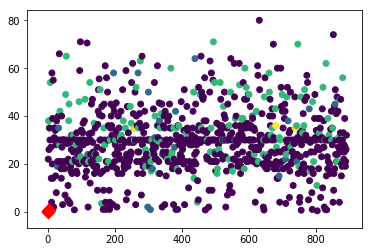

In [26]:
#plot the centroids with centroid location
import matplotlib.pyplot as plt
plt.scatter(xs,ys,c=labels,s=35)
plt.scatter(centroid_x,centroid_y,marker="D",c="r",s=80)
plt.show()

In [27]:
df.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived_0', 'Survived_1',
       'Sex_female', 'Sex_male', 'title_ Capt', 'title_ Col', 'title_ Don',
       'title_ Dr', 'title_ Jonkheer', 'title_ Lady', 'title_ Major',
       'title_ Master', 'title_ Miss', 'title_ Mlle', 'title_ Mme',
       'title_ Mr', 'title_ Mrs', 'title_ Ms', 'title_ Rev', 'title_ Sir',
       'title_ the Countess'],
      dtype='object')

In [28]:
x=df.iloc[:,1:25].values
y=df.iloc[:,0].values

In [29]:
#find train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)


In [30]:
#apply standard scaler
sc=StandardScaler()
xtrain=sc.fit_transform(x_train)
xtest=sc.transform(x_test)

In [31]:
# logistic regression
lr=LogisticRegression()
model_lr=lr.fit(xtrain,y_train)
pred=lr.predict(xtest)
accuracy_score(y_test,pred)*100

C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


79.88826815642457

In [32]:
####decision Tree
model=DecisionTreeClassifier(criterion = 'entropy',random_state=123)
model.fit(xtrain,y_train)
ypred=model.predict(xtest)
accuracy_sc=metrics.accuracy_score(y_test,ypred)
accuracy_sc

0.9162011173184358

In [33]:
##### Random forest
model_rf=RandomForestClassifier(random_state=123)
model_rf.fit(xtrain,y_train)
prede=model_rf.predict(xtest)
acc_sc=metrics.accuracy_score(y_test,prede)
acc_sc

C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.88268156424581

In [34]:
### PCA
pc=PCA(n_components=2)
xtrain1=pc.fit_transform(xtrain)
xtest1=pc.transform(xtest)
expvariance=pc.explained_variance_ratio_

In [35]:
expvariance

array([0.21406559, 0.08738782])

In [36]:
lr.fit(xtrain1,y_train)

C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
pred1=lr.predict(xtest1)
accuracy_score(y_test,pred1)

0.6256983240223464

In [38]:
model_rf=RandomForestClassifier(random_state=123)
model_rf.fit(xtrain,y_train)
prede_rf=model_rf.predict(xtest)

C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [41]:
Id=data['PassengerId'].values.tolist()
Prediction=prede_rf
d={'PassengerId':Id,'Survived':Prediction}

In [42]:
solution_rf=pd.DataFrame({'PassengerId':Id,'Survived':prede_rf})

ValueError: arrays must all be same length

In [ ]:
solution_rf.to_csv('RandomForestRegressor.csv')